# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a BeautifulSoup Object
html = browser.html
temp_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
temp_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Find the table that contain the required column headings and data
table = temp_soup.find('table', class_ = 'table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [7]:
# Create an empty dictionary to store 7 fields in a record
mars_temp = {}

# Find all the rows in the table
rows = table.find_all('tr', class_ = 'data-row')

# Create an empty list to store all dictionaries containing all records
summary_list = []

# Loop through each block of 7 fields
for row in rows:
    id_data = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    mars_temp = {'id': id_data,
                'terrestrial_date': terrestrial_date,
                'sol': sol,
                'ls': ls,
                'month': month,
                'min_temp': min_temp,
                'pressure': pressure}
    summary_list.append(mars_temp)


In [8]:
# Verify that the 7 fields with data were stored correctly in the list
summary_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame([data])
print(df)

In [9]:
# Convert the summary list to a Pandas DataFrame
df = pd.DataFrame(summary_list)

In [10]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], format='%Y-%m-%d')
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
np.unique(df['month'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [15]:
# 2. How many Martian days' worth of data are there?
df['terrestrial_date'].nunique()

1867

In [29]:
# 3. What is the average low temperature by Martian month?
mar_month_mean_min_temp = df.groupby('month')['min_temp'].mean()
mar_month_mean_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [30]:
# 3. What is the average low temperature by terrestrial month?
df['terrestrial_month'] = df['terrestrial_date'].dt.month
ter_month_mean_min_temp = df.groupby('terrestrial_month')['min_temp'].mean()
ter_month_mean_min_temp

terrestrial_month
1    -76.988506
2    -76.909091
3    -77.349206
4    -76.098592
5    -75.573427
6    -75.671233
7    -76.177305
8    -75.851613
9    -75.816092
10   -75.685083
11   -75.537975
12   -75.994220
Name: min_temp, dtype: float64

In [18]:
# Create 2 variables for all Martian months and terrestrial months
mar_months = df['month'].unique()
ter_months = df['terrestrial_month'].unique()
print(mar_months, ter_months)

[ 6  7  8  9 10 11 12  1  2  3  4  5] [ 8  9 10 11 12  1  2  3  4  5  6  7]


Text(0.5, 1.0, 'Average Low Temperature by Martian Month')

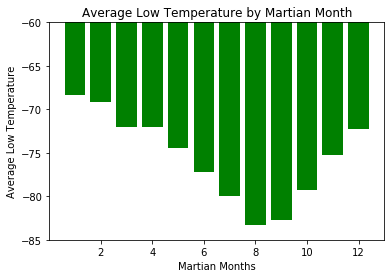

In [19]:
# Plot the average temperature by Martian month
plt.bar(mar_months,mar_month_mean_min_temp, color='green')

# Create labels for the x and y axes.
plt.xlabel("Martian Months")
plt.ylabel("Average Low Temperature")
plt.ylim([-85,-60])

# Create title 
plt.title('Average Low Temperature by Martian Month')

Text(0.5, 1.0, 'Average Low Temperature by Terrestrial Month')

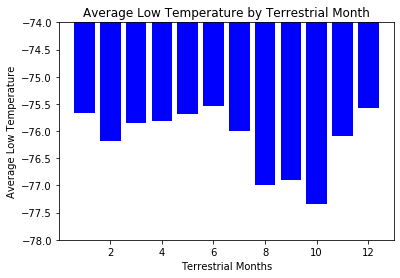

In [31]:
# Plot the average temperature by terrestrial month
plt.bar(ter_months,ter_month_mean_min_temp, color='blue')

# Create labels for the x and y axes.
plt.xlabel("Terrestrial Months")
plt.ylabel("Average Low Temperature")
plt.ylim([-78,-74])

# Create title 
plt.title('Average Low Temperature by Terrestrial Month')

In [21]:
# List all headers of the dataframe
headers = list(df)
headers

['id',
 'terrestrial_date',
 'sol',
 'ls',
 'month',
 'min_temp',
 'pressure',
 'terrestrial_month']

In [22]:
# Identify the coldest and hottest months in Curiosity's location
df.loc[(df['min_temp'] == df['min_temp'].min()) | (df['min_temp'] == df['min_temp'].max()), headers[1:]]

,terrestrial_date,sol,ls,month,min_temp,pressure,terrestrial_month
1093,2015-12-09,1188,79,3,-90.0,881.0,12
1582,2017-05-10,1692,2,1,-62.0,820.0,5


In [23]:
# 4. Average pressure by Martian month
mar_month_avg_pressure = df.groupby('month')['pressure'].mean().sort_values()
mar_month_avg_pressure

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Average Pressure by Martian Month')

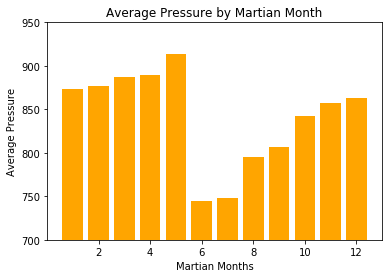

In [24]:
# Plot the average pressure by month
plt.bar(mar_months,mar_month_avg_pressure, color='orange')

# Create labels for the x and y axes.
plt.xlabel("Martian Months")
plt.ylabel("Average Pressure")
plt.ylim([700,950])

# Create title 
plt.title('Average Pressure by Martian Month')

In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# The ls is the same after Mars completes one full circle around the Sun

# Set the ls rows to be the landmark for Mars' one full circle around the Sun
ls_155 = df.loc[df['ls'] == 155]

# Subtract the terrestrial dates of 2 consecutive ls rows to arrive at the answer
earth_days_in_Mar_yr = ls_155.iloc[1, 1] - ls_155.iloc[0, 1]

print(f'In one Martial year, nearly ',earth_days_in_Mar_yr,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [28]:
# Quit the browser
browser.quit()